<a target="_blank" href="https://colab.research.google.com/github/https://colab.research.google.com/github/giordamaug/HELP/blob/v2.0/notebooks/prediction.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
<a target="_blank" href="https://www.kaggle.com/notebooks/welcome?src=<a target="_blank" href="https://colab.research.google.com/github/giordamaug/HELP/blob/v2.0/notebooks/prediction.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>">
  <img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Colab"/>
</a>

### 1. Plots and Tables of results in E vs NE problem

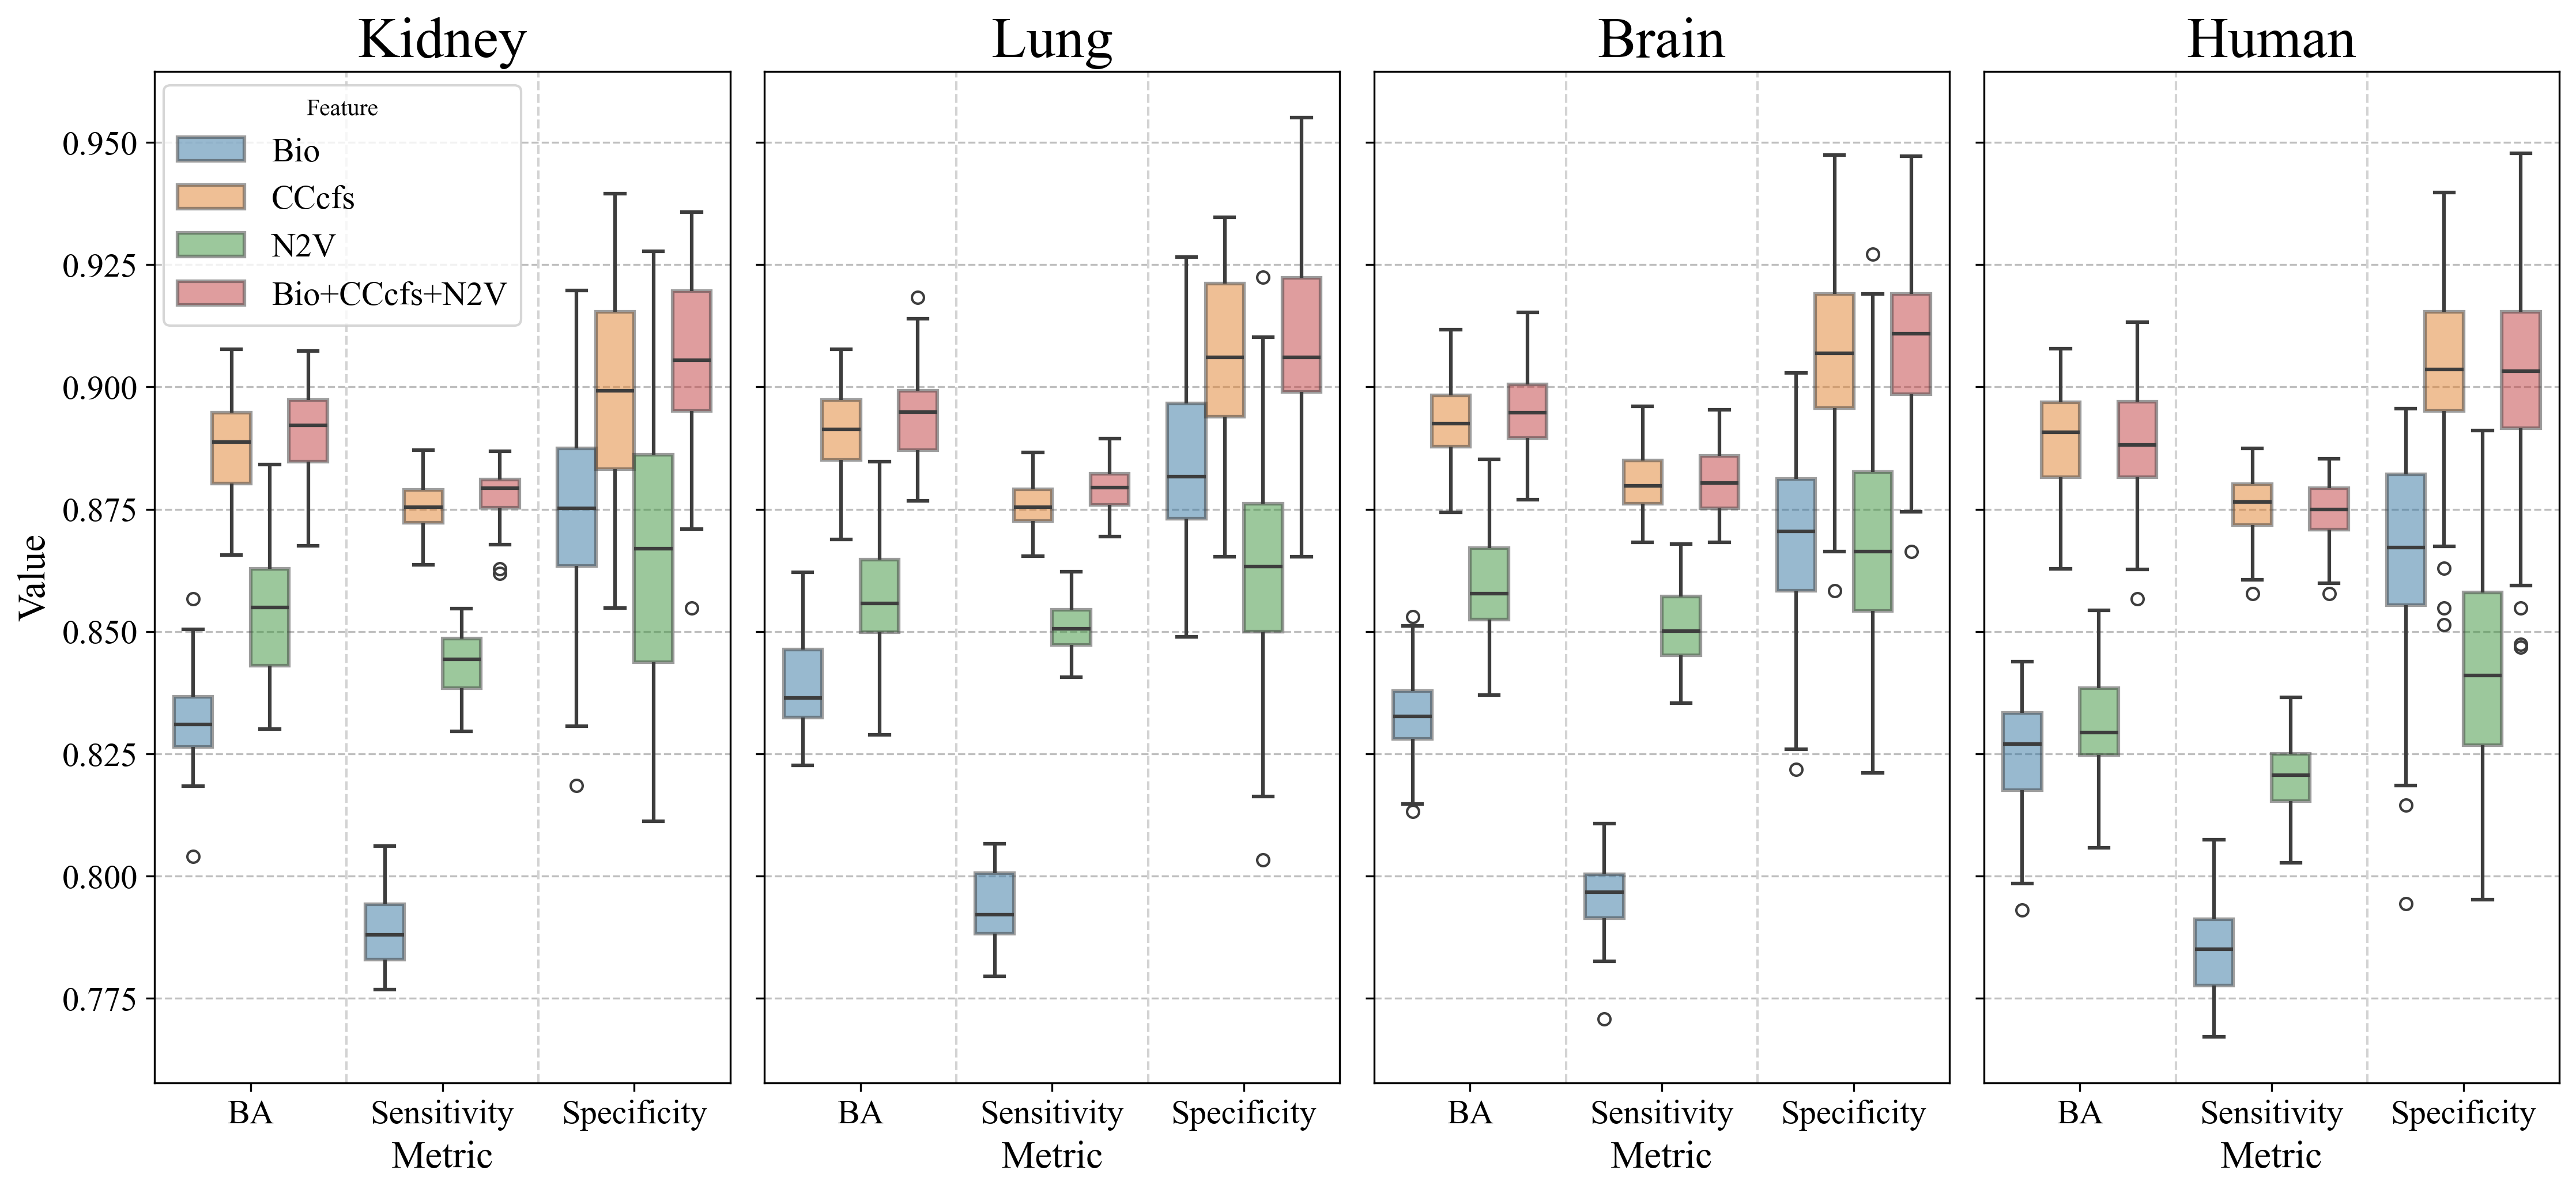

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

tissues = ['Kidney', 'Lung', 'Brain', 'Human']
scorepath = '../scores'
features = ["Bio", "CCcfs", "N2V", "Bio+CCcfs+N2V"]
suffixes = ['bio', 'biocc', 'n2v', 'bioccn2v']
problem = 'EvsNE'
labels = ['(A) Kidney', '(B) Lung', '(C) Brain']
fsize = 14
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 300

def generate_subplot(Scores, ax, fsize=10):
    sns.boxplot(x='Metric', y='Value', hue='Feature', data=Scores, dodge=True, linewidth=1.5, fliersize=5,
                saturation=0.75, notch=False, boxprops=dict(alpha=0.5), ax=ax)
    ax.set_xlabel("Metric", fontsize=int(fsize)+2)
    ax.set_ylabel('Value', fontsize=int(fsize)+2)
    ax.tick_params(axis='both', which='major', labelsize=fsize)
    ax.grid(axis="y", linestyle="--", alpha=0.8)
    unique_metrics = Scores["Metric"].unique()
    for i in range(1, len(unique_metrics)):
        ax.axvline(x=i - 0.5, color='lightgray', linestyle='--', linewidth=1)
    ax.get_legend().remove()

# Creazione di una figura con tre subplot su stessa riga
fig, axs = plt.subplots(1, len(tissues), figsize=(15, 7), sharey=True)

# Iterazione sui subplot e applicazione della funzione generate_subplot
for i, tissue in enumerate(tissues):
    dfs = []
    for feature, suffix in zip(features, suffixes):
        df_tmp = pd.read_csv(os.path.join(scorepath, f"score_HELP_{tissue}_{problem}_{suffix}.csv")).drop(columns=["ROC-AUC", "Accuracy", "MCC", "CM"])
        df_tmp['Feature'] = feature
        dfs.append(df_tmp)

    # Merge datasets and modify the dataframe for boxplot generation
    Scores = pd.concat(dfs)
    Scores = pd.melt(Scores, id_vars=["Feature"], var_name="Metric", value_name="Value")
    generate_subplot(Scores, axs[i], fsize=fsize)
    axs[i].set_title(f"{tissues[i]}", y=1, fontsize=24)

# Posizionamento della legenda unica
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.06, 0.71), fontsize=fsize, title='Feature', title_fontsize='10')

# Visualizzazione della figura
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import os
import re
scorepath = '../scoresgm'
method1 = 'HELP'
tissue = 'Human'
problem = 'EvsNE'
precision = 3
df_p = pd.DataFrame()
df_means = pd.DataFrame()
features = ["Bio", "N2V", "CCcfs", "Bio+CC", "Bio+CCcfs+N2V"]
suffixes = ['bio', 'n2v', 'cc', 'biocc', 'bioccn2v']
cmlist = []
for feature, suffix in zip(features,suffixes):
    print(feature, suffix)
    df = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_{suffix}.csv"))
    df['cm'] = df['cm'].apply(lambda x: np.array([int(a) for a in re.findall(r'\d+', x)]))
    #df['TN'] = df['CM'].apply(lambda x: x[0])
    #df['FP'] = df['CM'].apply(lambda x: x[1])
    #df['FN'] = df['CM'].apply(lambda x: x[2])
    #df['TP'] = df['CM'].apply(lambda x: x[3])
    #df['Precision'] = df.apply(lambda x: x.TP / (x.TP + x.FP), axis=1)
    #df['G-mean'] = df.apply(lambda x: np.sqrt(x.Sensitivity * x.Specificity), axis=1)
    metrics = df.drop(columns=['cm']).columns
    means, stds = df.drop(columns=['cm']).mean(), df.drop(columns=['cm']).std()
    row_df = pd.DataFrame([[f"{means[m]:.3f}±{stds[m]:.3f}" for m in metrics]], columns=metrics, index=[feature])
    row_df.index.name = 'feature'
    cma = np.zeros((4,), dtype=float)
    for i in range(len(df)):
        cma +=  df.iloc[i]['cm'] / 10
    cma = np.reshape(cma, (2,2))
    cmlist += ["\cm{"+"{:.1f}".format(cma[0][0])+"}{"+"{:.1f}".format(cma[0][1])+"}{"+"{:.1f}".format(cma[1][0])+"}{"+"{:.1f}".format(cma[1][1])+"}{NE}{E}{"+"{:.1f}".format(cma[0][0]+cma[0][1])+"}{"+"{:.1f}".format(cma[1][0]+cma[1][1])+"}"]
    df_means = pd.concat([df_means, pd.DataFrame([[f"{means[m]:.3f}" for m in metrics]], columns=metrics)])
    df_p = pd.concat([df_p, row_df])

df_means = df_means.set_index(pd.Index(data=features, name='feature'))

print(tabulate(df_p.T, headers=features, tablefmt="latex"))
display(df_p.T)
print("CM & " + " & ".join(cmlist))

Bio bio
N2V n2v
CCcfs cc
Bio+CC biocc
Bio+CCcfs+N2V bioccn2v
\begin{tabular}{llllll}
\hline
             & Bio         & N2V         & CCcfs       & Bio+CC      & Bio+CCcfs+N2V   \\
\hline
 ROC-AUC     & 0.910±0.008 & 0.910±0.010 & 0.942±0.008 & 0.957±0.006 & 0.957±0.007     \\
 Accuracy    & 0.801±0.008 & 0.833±0.007 & 0.849±0.006 & 0.883±0.007 & 0.882±0.007     \\
 BA          & 0.825±0.011 & 0.830±0.012 & 0.867±0.011 & 0.889±0.011 & 0.887±0.012     \\
 G-mean      & 0.824±0.011 & 0.830±0.012 & 0.867±0.011 & 0.889±0.011 & 0.887±0.012     \\
 Specificity & 0.797±0.009 & 0.833±0.007 & 0.846±0.007 & 0.882±0.007 & 0.881±0.007     \\
 Sensitivity & 0.853±0.023 & 0.826±0.024 & 0.889±0.021 & 0.896±0.020 & 0.893±0.023     \\
 MCC         & 0.388±0.015 & 0.416±0.016 & 0.469±0.015 & 0.531±0.018 & 0.528±0.019     \\
\hline
\end{tabular}


feature,Bio,N2V,CCcfs,Bio+CC,Bio+CCcfs+N2V
ROC-AUC,0.910±0.008,0.910±0.010,0.942±0.008,0.957±0.006,0.957±0.007
Accuracy,0.801±0.008,0.833±0.007,0.849±0.006,0.883±0.007,0.882±0.007
BA,0.825±0.011,0.830±0.012,0.867±0.011,0.889±0.011,0.887±0.012
G-mean,0.824±0.011,0.830±0.012,0.867±0.011,0.889±0.011,0.887±0.012
Specificity,0.797±0.009,0.833±0.007,0.846±0.007,0.882±0.007,0.881±0.007
Sensitivity,0.853±0.023,0.826±0.024,0.889±0.021,0.896±0.020,0.893±0.023
MCC,0.388±0.015,0.416±0.016,0.469±0.015,0.531±0.018,0.528±0.019


CM & \cm{12739.1}{3252.9}{182.4}{1059.6}{NE}{E}{15992.0}{1242.0} & \cm{13327.2}{2664.8}{216.3}{1025.7}{NE}{E}{15992.0}{1242.0} & \cm{13527.3}{2464.7}{137.8}{1104.2}{NE}{E}{15992.0}{1242.0} & \cm{14102.7}{1889.3}{129.3}{1112.7}{NE}{E}{15992.0}{1242.0} & \cm{14093.0}{1899.0}{132.4}{1109.6}{NE}{E}{15992.0}{1242.0}


### 2. Tables of results in E vs aE, E vs sNE and aE vs sNE problems

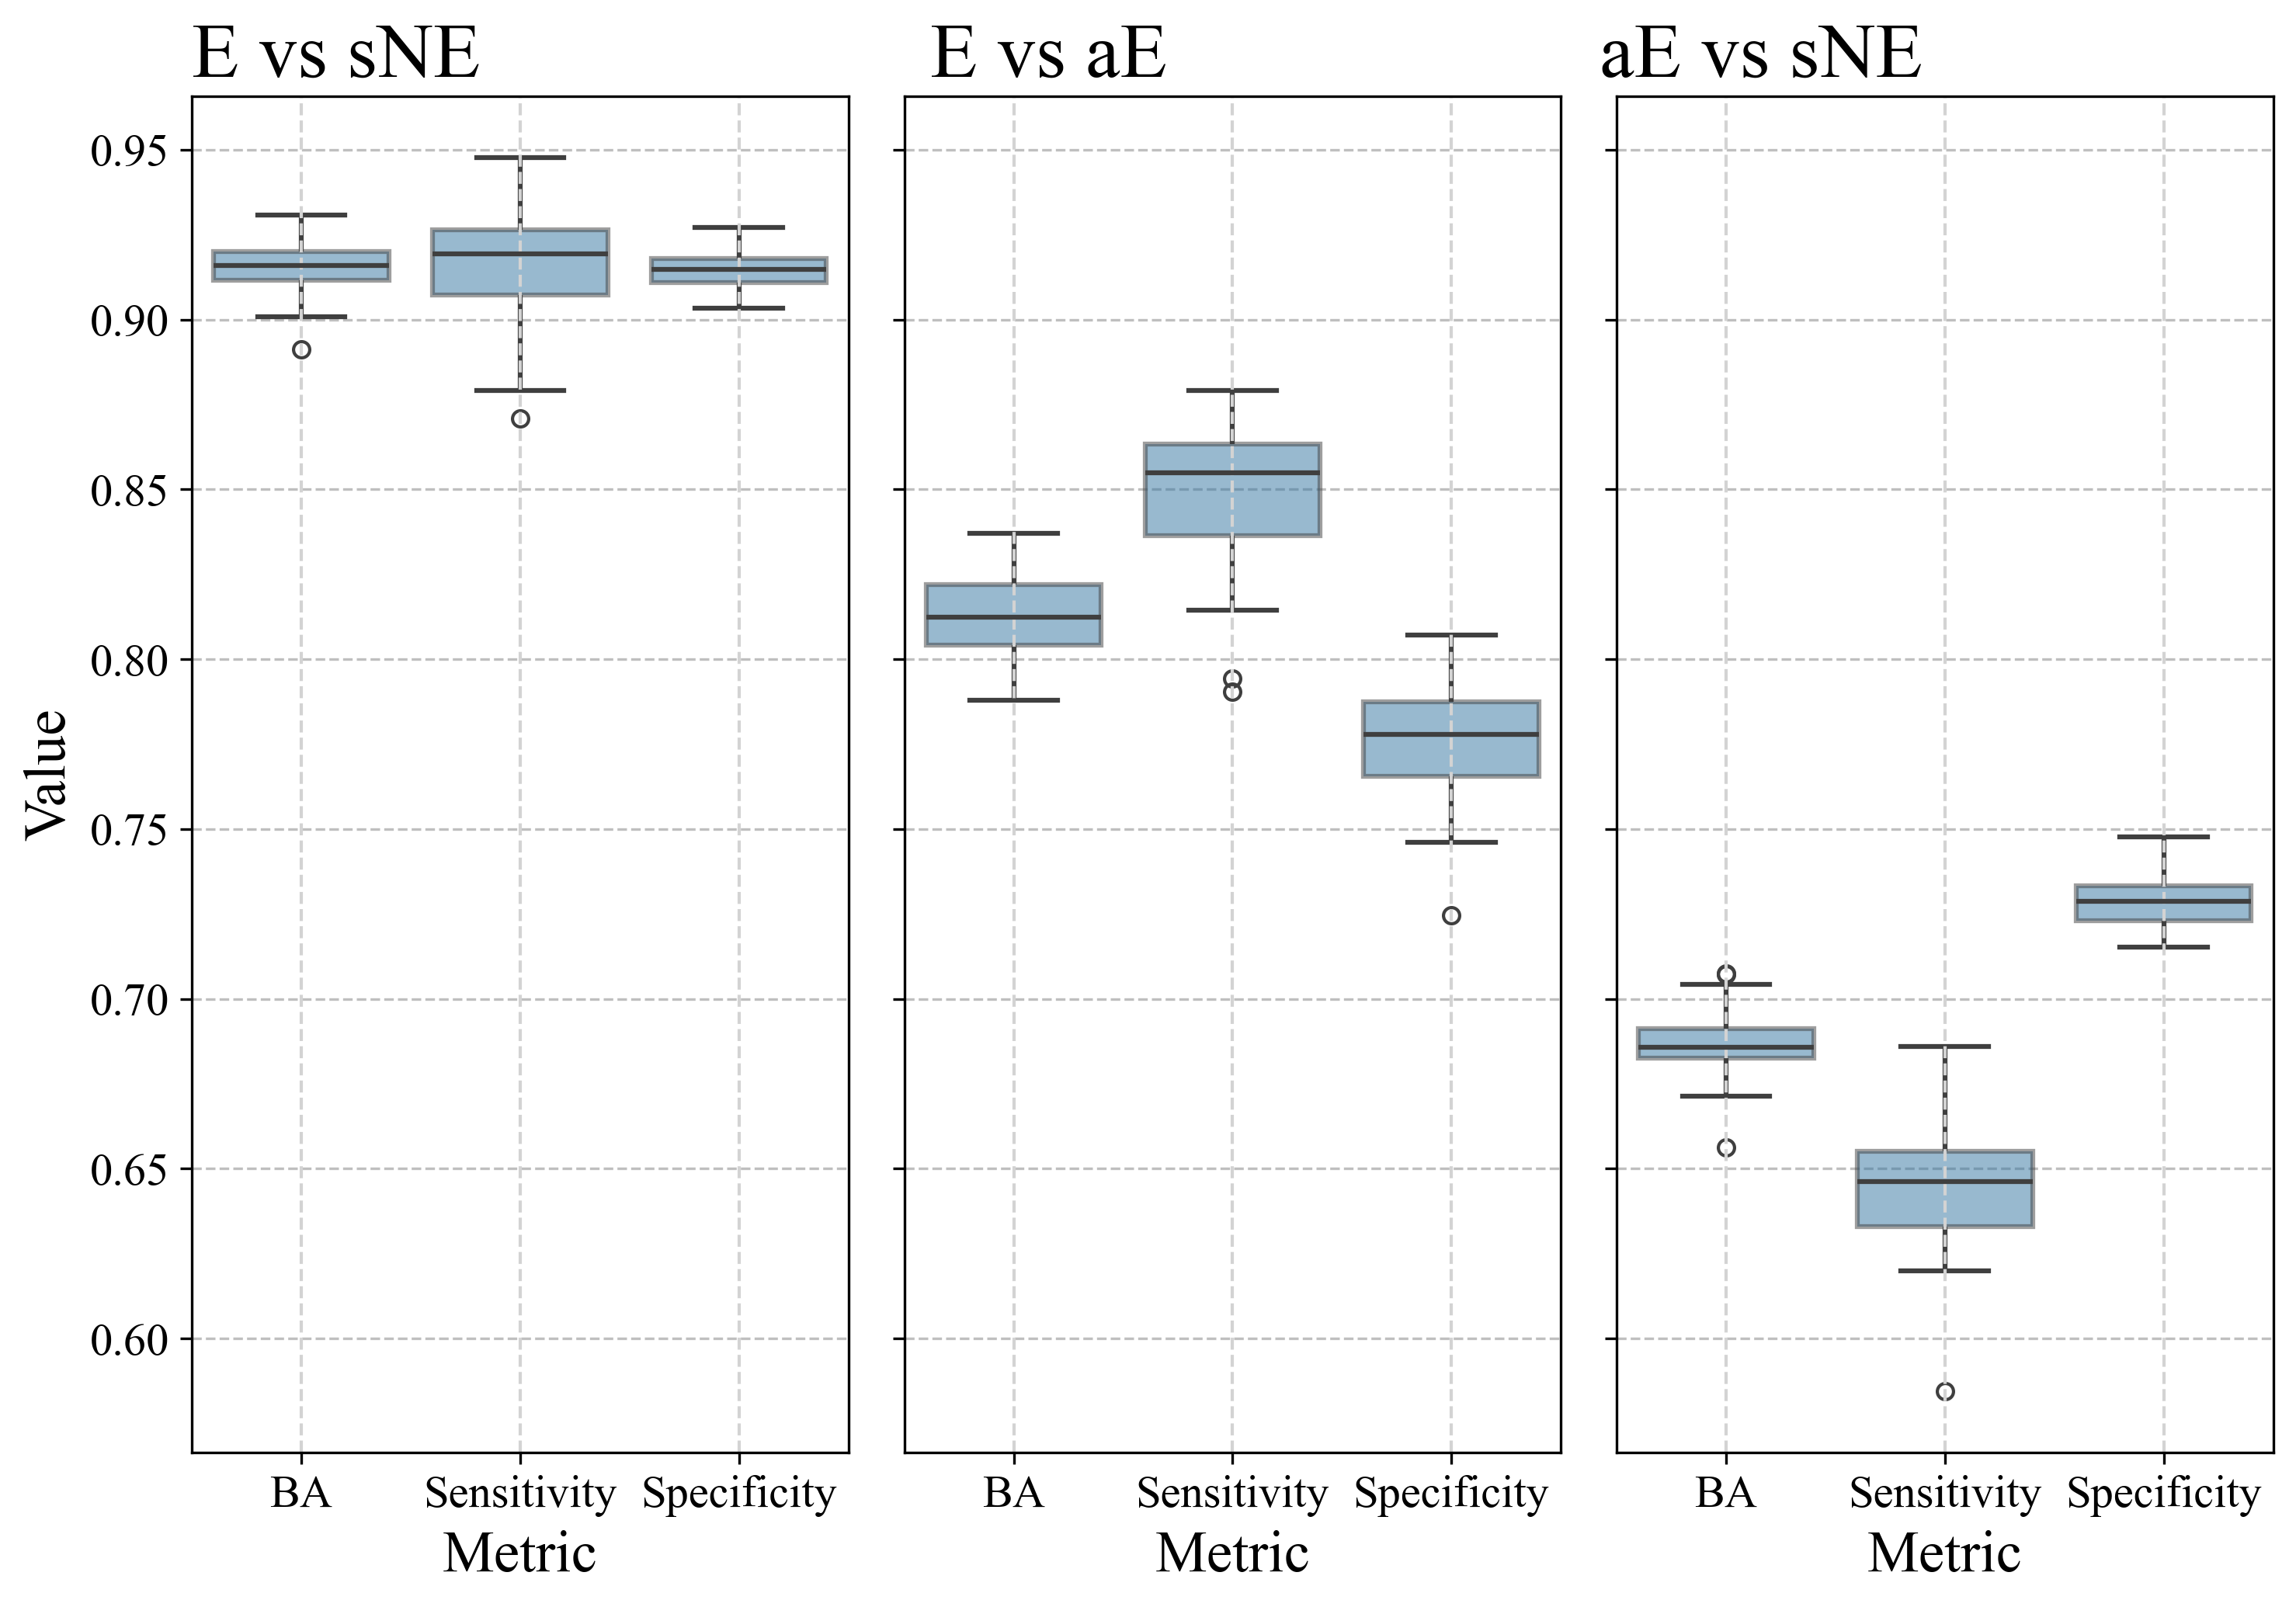

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

tissue = 'Kidney'
scorepath = '../scores'
features = ["Bio+CCcfs+N2V"]
suffixes = ['bioccn2v']
problems = ['EvsSNE', 'EvsaE', 'aEvsSNE']
labels = ['E vs sNE', 'E vs aE', 'aE vs sNE']
fsize = 14
plt.rcParams["font.family"] = "Times New Roman"
def generate_subplot(Scores, ax, fsize=10):
    sns.boxplot(x='Metric', y='Value', hue='Feature', data=Scores, dodge=True, linewidth=1.5, fliersize=5,
                saturation=0.75, notch=False, boxprops=dict(alpha=0.5), ax=ax)
    ax.set_xlabel("Metric", fontsize=int(fsize)+4)
    ax.set_ylabel('Value', fontsize=int(fsize)+4)
    ax.tick_params(axis='both', which='major', labelsize=fsize)
    ax.grid(axis="y", linestyle="--", alpha=0.8)
    unique_metrics = Scores["Metric"].unique()
    for i in range(0, len(unique_metrics)):
        ax.axvline(x=i, color='lightgray', linestyle='--', linewidth=1)
    ax.get_legend().remove()

fig, axs = plt.subplots(1, len(problems), figsize=(10, 7), sharey=True)

for i, problem in enumerate(problems):
    dfs = []
    for feature, suffix in zip(features, suffixes):
        df_tmp = pd.read_csv(os.path.join(scorepath, f"score_HELP_{tissue}_{problem}_{suffix}.csv")).drop(columns=["ROC-AUC", "Accuracy", "MCC", "CM"])
        df_tmp['Feature'] = feature
        dfs.append(df_tmp)

    # Merge datasets and modify the dataframe for boxplot generation
    Scores = pd.concat(dfs)
    Scores = pd.melt(Scores, id_vars=["Feature"], var_name="Metric", value_name="Value")
    generate_subplot(Scores, axs[i], fsize=fsize)
    axs[i].set_title(f"{labels[i]}", x=0.22, y=1.0, fontsize=24)

plt.tight_layout()
plt.show()

In [28]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import os
scorepath = '../scores'
method1 = 'HELP'
tissue = 'Kidney'
problems = ['EvsSNE', 'EvsAE', 'AEvsSNE']
labels = [('E','sNE'), ('E', 'aE'), ('aE', 'sNE')]
precision = 3
df_p = pd.DataFrame()
df_means = pd.DataFrame()
features = ["Bio+CCcfs+N2V"]
suffixes = ['bioccn2v','bioccn2v','bioccn2v']
for problem, suffix, cla in zip(problems,suffixes,labels):
    df = pd.read_csv(os.path.join(scorepath, f"score_{method1}_{tissue}_{problem}_{suffix}.csv"))
    dfcm = df['CM'].replace(regex=r' ', value=r',').replace(regex=r'\[,', value='[').replace(regex=r'\n', value=',').replace(regex=r',,,', value=',').replace(regex=r',,', value=',')
    df['CM'] = df['CM'].apply(lambda x: np.array([int(a) for a in re.findall(r'\d+', x)]))
    df['TN'] = df['CM'].apply(lambda x: x[0])
    df['FP'] = df['CM'].apply(lambda x: x[1])
    df['FN'] = df['CM'].apply(lambda x: x[2])
    df['TP'] = df['CM'].apply(lambda x: x[3])
    df['Precision'] = df.apply(lambda x: x.TP / (x.TP + x.FP), axis=1)
    df['G-mean'] = df.apply(lambda x: np.sqrt(x.Sensitivity * x.Specificity), axis=1)
    metrics = df.drop(columns=['CM']).columns
    means, stds = df.drop(columns=['CM']).mean(), df.drop(columns=['CM']).std()
    row_df = pd.DataFrame([[f"{means[m]:.3f}±{stds[m]:.3f}" for m in metrics]], columns=metrics, index=[problem])
    row_df.index.name = 'problem'
    cma = np.zeros((2,2), dtype=float)
    for i in range(len(df)):
        cma += np.array(eval(dfcm.iloc[i])) / 10
    row_df['CM'] = f'{cma}'
    row_df['CM'] = row_df['CM'].replace(regex=r' ', value=r',').replace(regex=r'\[,', value='[').replace(regex=r'\n', value=',').replace(regex=r',,,', value=',').replace(regex=r',,', value=',')
    df_means = pd.concat([df_means, pd.DataFrame([[f"{means[m]:.3f}" for m in metrics]], columns=metrics)])
    df_p = pd.concat([df_p, row_df])

df_means = df_means.set_index(pd.Index(data=problems, name='feature'))
df_p.T

problem,EvsSNE,EvsAE,AEvsSNE
ROC-AUC,0.973±0.004,0.895±0.009,0.751±0.010
Accuracy,0.915±0.005,0.797±0.012,0.713±0.007
BA,0.915±0.007,0.813±0.012,0.687±0.010
Sensitivity,0.916±0.016,0.849±0.021,0.644±0.019
Specificity,0.915±0.005,0.776±0.016,0.729±0.008
MCC,0.645±0.013,0.576±0.022,0.311±0.016
TN,227.440±3.970,210.860±5.079,400.360±11.808
FP,20.960±3.928,37.540±5.104,221.240±11.687
FN,219.200±14.110,139.140±9.679,697.920±19.761
TP,2358.000±14.241,482.460±9.780,1879.280±19.796
